# WellCAD - Full-waveform sonic log format - WAF file

In [1]:
import wellcadformats

import matplotlib.pyplot as plt

## Reading data in

Load data file. This was generated from within WellCAD by exporting data from an FWS40 tool.

In [2]:
log = wellcadformats.WAF("full_waveform_sonic.waf")

In [3]:
log

Some summary information

In [4]:
log.print_depths()

depths range from 102.41 to 112.94 n = 212
times range from 0 to 2000 m = 501
data shape = (212, 501)


Show the amplitude distribution

<Axes: >

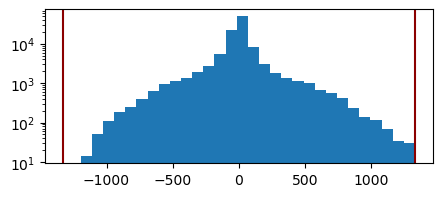

In [5]:
log.plot_amplitude_hist(fig=plt.figure(figsize=(5, 2)))

Show a VDL

<Axes: >

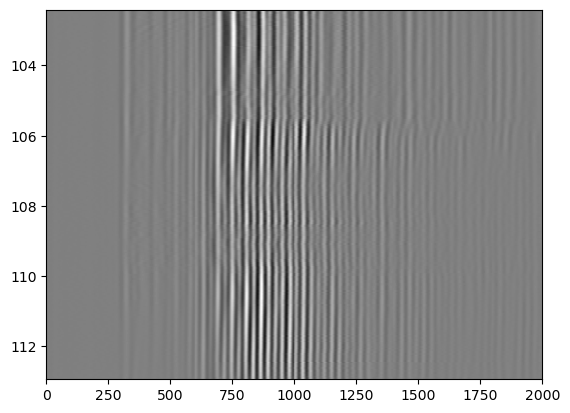

In [6]:
log.imshow()

Show the VDL with a lower amplitude threshold to highlight detail

<Axes: >

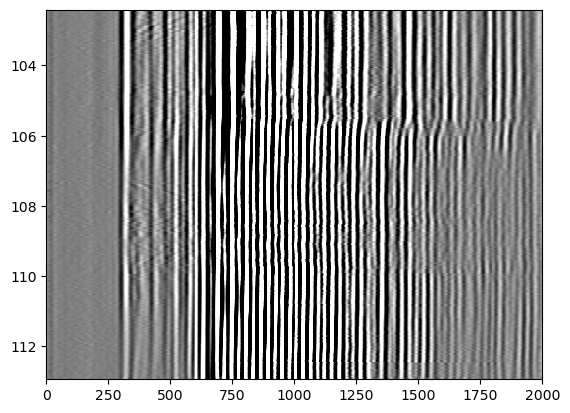

In [7]:
log.imshow(vampl=100)

Note that the narrower amplitude threshold is shown here

<Axes: >

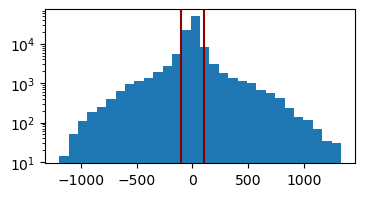

In [8]:
log.plot_amplitude_hist(fig=plt.figure(figsize=(4, 2)))

Extract a subset

In [9]:
log2 = log.extract(drange=(105, 109.5))

<Axes: >

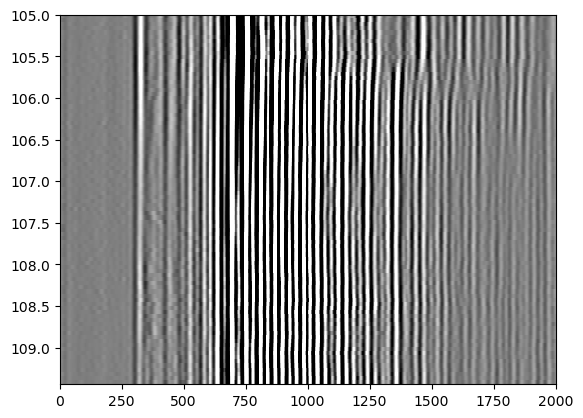

In [10]:
log2.imshow(vampl=150)

Extract just the first two arrivals

<Axes: >

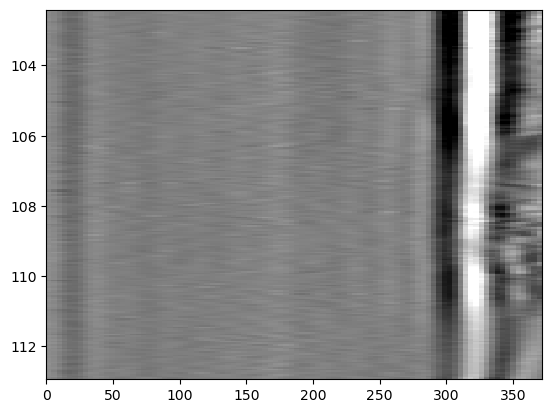

In [11]:
log3 = log.extract(trange=(0, 375))
log3.imshow()

Pull out a vertical trace

In [12]:
import numpy as np

Text(0.5, 1.0, 'Vertical trace from time = 321')

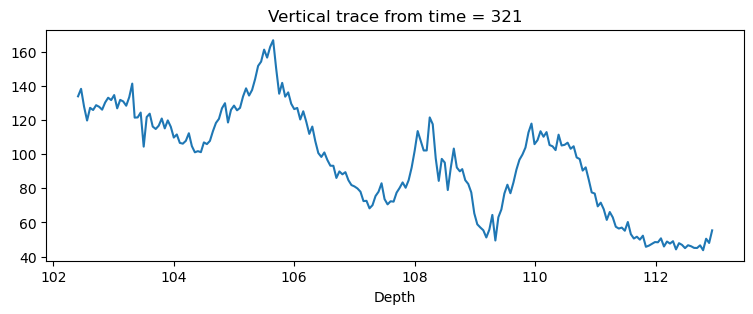

In [13]:
time, vdata = log.vtrace(321)
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(111)
ax.plot(log.depths, vdata)
ax.set_xlabel("Depth")
ax.set_title(f"Vertical trace from time = {time}")

And a horizontal trace

Text(0.5, 1.0, 'Horizontal trace from depth = 108.99')

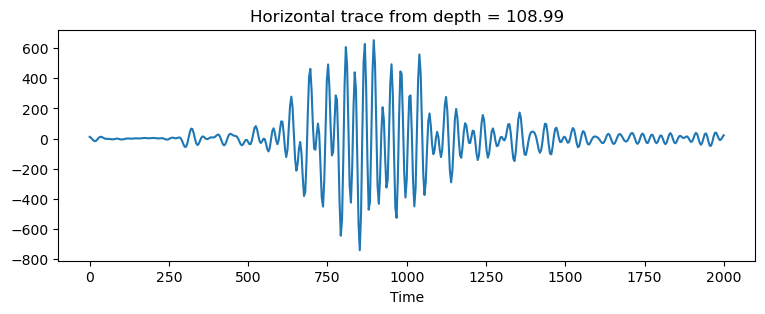

In [14]:
depth, hdata = log.htrace(109)

fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(111)
ax.plot(log.times, hdata)
ax.set_xlabel("Time")
ax.set_title(f"Horizontal trace from depth = {depth}")

# Creating a WAF file from data

Generate some fake data - times ranging from 0 to 100 and depths ranging from 0 to 10

In [15]:
times = np.linspace(0, 1000, 20)
depths = np.linspace(0, 100, 20)

data = np.zeros((len(depths), len(times)))
for i, depth in enumerate(depths):
    comp2 = np.sin(2 * np.pi * (1 / 100) * times)
    comp1 = np.hstack([
        np.zeros_like(times[:70]),
        np.sin(2 * np.pi * (1 / 90) * times[70:] + (223 + depth / 1.2) / np.pi)
    ]) * -1
    comp = comp1 * comp2
    data[i, :] = comp

Create log

In [16]:
log = wellcadformats.WAF.from_data(data, depths=depths, times=times)

<Axes: >

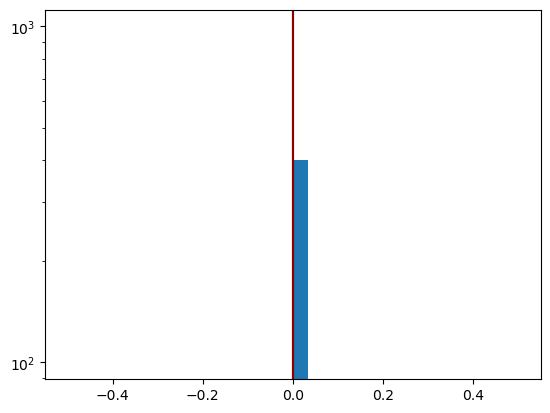

In [17]:
log.plot_amplitude_hist()

<Axes: >

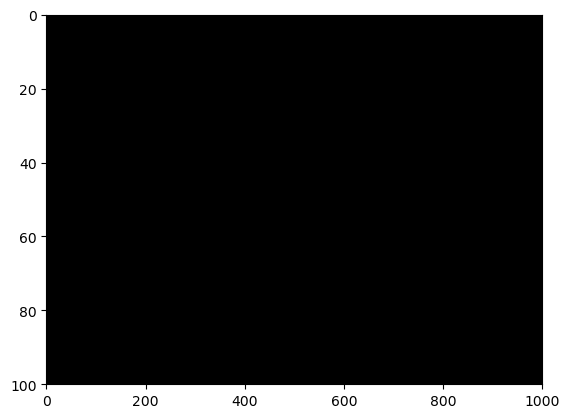

In [18]:
log.imshow()

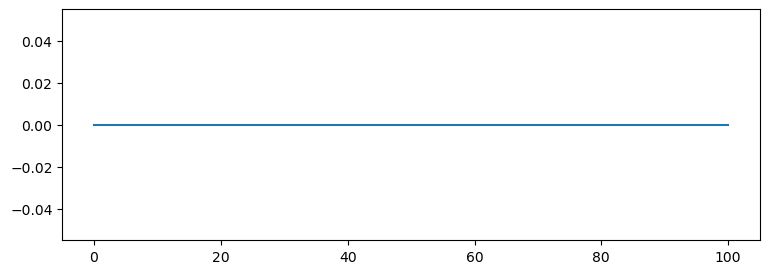

In [19]:
time, data = log.vtrace(400)
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(111)
ax.plot(log.depths, data)

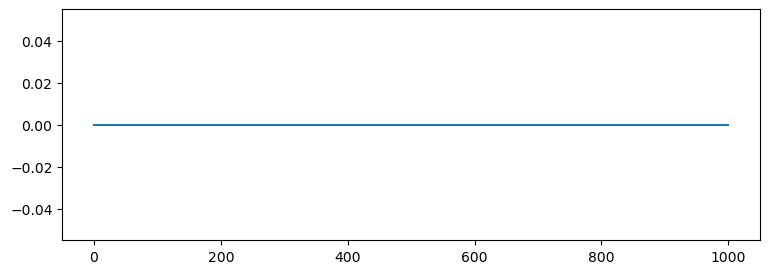

In [20]:
depth, data = log.htrace(12.5)
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(111)
ax.plot(log.times, data)

In [21]:
import sys

log.to_file(sys.stdout)

Depth,0.00 us,52.63 us,105.26 us,157.89 us,210.53 us,263.16 us,315.79 us,368.42 us,421.05 us,473.68 us,526.32 us,578.95 us,631.58 us,684.21 us,736.84 us,789.47 us,842.11 us,894.74 us,947.37 us,1000.00 us
m,,,,,,,,,,,,,,,,,,,,


AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'